In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris = load_iris()

In [7]:
 iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# convert iris dataset to a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = iris.target


In [13]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [14]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [15]:
# 50 records of each target
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

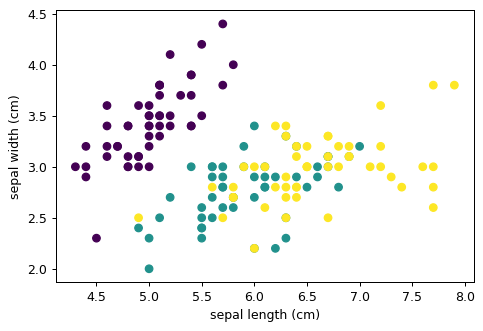

In [16]:
plt.figure(dpi=90)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)');

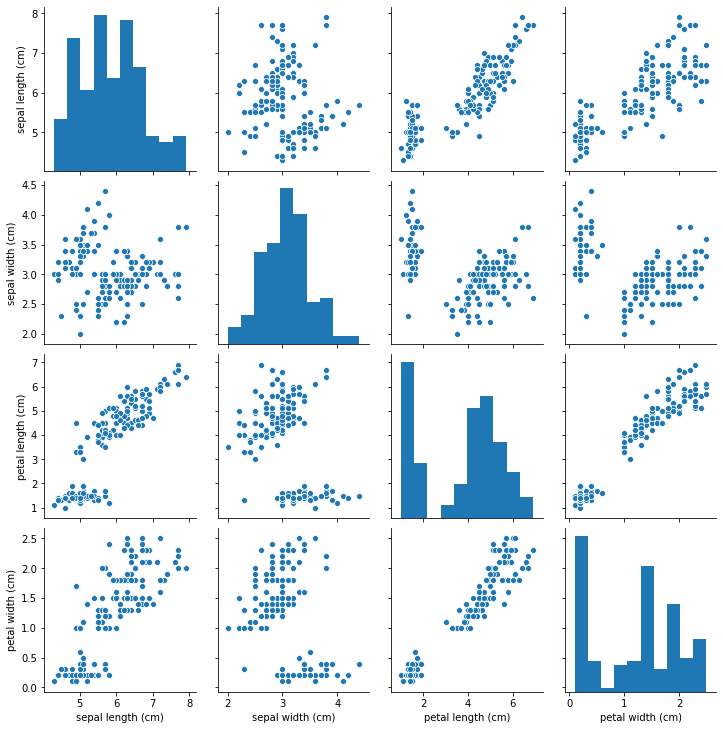

In [17]:
temp_df = df.drop('target', axis=1)
sns.pairplot(temp_df);

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [19]:
x = df.drop('target', axis=1)

In [20]:
print(x.head())
print(x.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)


In [21]:
y = df['target']

In [23]:

print(y.sample(5))
print(y.shape)

145    2
72     1
39     0
116    2
50     1
Name: target, dtype: int32
(150,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [25]:
# consider closest neighbour to the datapoint
knn_one = KNeighborsClassifier(n_neighbors=1)

In [26]:

# fit the model
knn_one.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
predictions = knn_one.predict(X_test)

In [28]:
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
round(accuracy_score(y_test, predictions) * 100, 4)

97.3684

In [31]:

new_entry = np.array([[4, 2.7, 1, 0.3]])

In [32]:
prediction = knn_one.predict(new_entry)
print(prediction)

[0]


In [33]:
# setosa
df['target'][prediction]

0    0
Name: target, dtype: int32

In [35]:
conf_mat = confusion_matrix(y_test, predictions)

df_conf_mat= pd.DataFrame(conf_mat,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

In [36]:
df_conf_mat

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


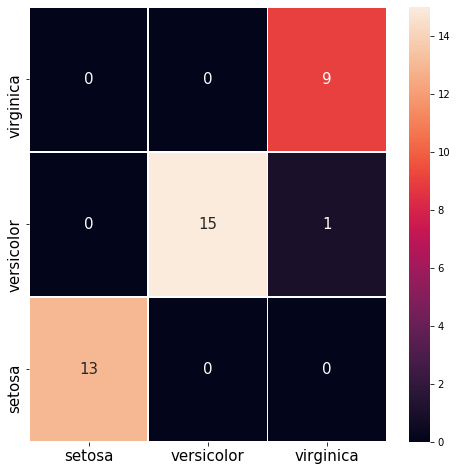

In [37]:

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_conf_mat, annot=True, linewidths=.5, annot_kws={"size": 15})
ax.set_ylim([0,3])
ax.tick_params(labelsize=15)